# Taller Evaluado Nº 2 (Regresion)
## Minería de Datos 2020

### 1.- AIrB&B 

**1.1**- Descargue los 4 csv del aula virtual (mismo lugar donde encontró este archivo). Este dataset corresponde a información sobre arriendos de la aplicación AirB&B en la pintoresca ciudad de Amsterdam, en Holanda. Los archivos estan separados en training y test, pero además se entrega la variable objetivo de la regresión en archivos separado llamados ``y_train.csv`` e ``y_test.csv`` respectivamente,

Las características (features) corresponden a:

| **Feature**   | **Descripción**                                       |
|---------------|-------------------------------------------------------|
| accommodates  | numero de pasajeros que caben en el alojamiento       |
| bathrooms     | cantifad de baños                                     |
| bedrooms      | cantidad de habitaciones |
| calculated_host_listings_count | cantidad de alojamientos disponibles calculado por la plataforma en la misma dirección |
| guests_included | cantidad de pasajeros incluidos en el precio por noche | 
| host_listings_count | cantidad de alojamientos disponibles declarados por el anunciante en la misma dirección |
| latitude | latitud |
| longitude | longitud |
| minimum_nights | cantidad mínima de noches |
| number_of_reviews | cantidad de comentarios realizados en la plataforma |
| d_centre | distancia al centro de la ciudad |
| instant_bookable_t | tiene reserva inmediata |
| instant_bookable_f | tiene reserva solo después de una confirmación |
| room_type_Entire home/apt | es un departamento/casa completa |
| room_type_Private room | es una pieza privada |
| room_type_Shared room | es una pieza compartida |

Además, los archivos ``y_train.csv`` e ``y_test.csv`` contienen el precio de arriendo para los dos conjuntos.

**1.2**- Cargue los 4 archivos en DataFrame pandas y muestre las estadísticas de las columnas tanto de los train como de los tests.

In [1]:
import numpy as np
import pandas as pd

x_train = pd.DataFrame(pd.read_csv("train.csv"))
x_test = pd.DataFrame(pd.read_csv("test.csv"))
y_train = pd.DataFrame(pd.read_csv("y_train.csv"))
y_test = pd.DataFrame(pd.read_csv("y_test.csv"))

print('x_train describe\n')
print(x_train.describe())
print('\n')
print('x_test describe\n')
print(x_test)
print('\n')
print('y_train describe\n')
print(y_train)
print('\n')
print('y_test describe\n')
print(y_test)

x_train describe

       accommodates     bathrooms      bedrooms  \
count  10498.000000  10498.000000  10498.000000   
mean       2.893694      1.120213      1.387598   
std        1.326817      0.360843      0.845380   
min        1.000000      0.000000      0.000000   
25%        2.000000      1.000000      1.000000   
50%        2.000000      1.000000      1.000000   
75%        4.000000      1.000000      2.000000   
max       17.000000      8.000000     10.000000   

       calculated_host_listings_count  guests_included  host_listings_count  \
count                    10498.000000     10498.000000         10498.000000   
mean                         2.891122         1.505239             3.349400   
std                          8.853806         0.955633            11.157171   
min                          1.000000         1.000000             0.000000   
25%                          1.000000         1.000000             1.000000   
50%                          1.000000         1.

**PREGUNTA**: Complete la tabla del punto 1.1. agregando el tipo de dato (i.e., real, entero, binario, categorico, etc.)

**1.3**- Muestre la matriz de correlación (con heatmap) incluyendo el precio de arriendo tanto para el training como para el test.

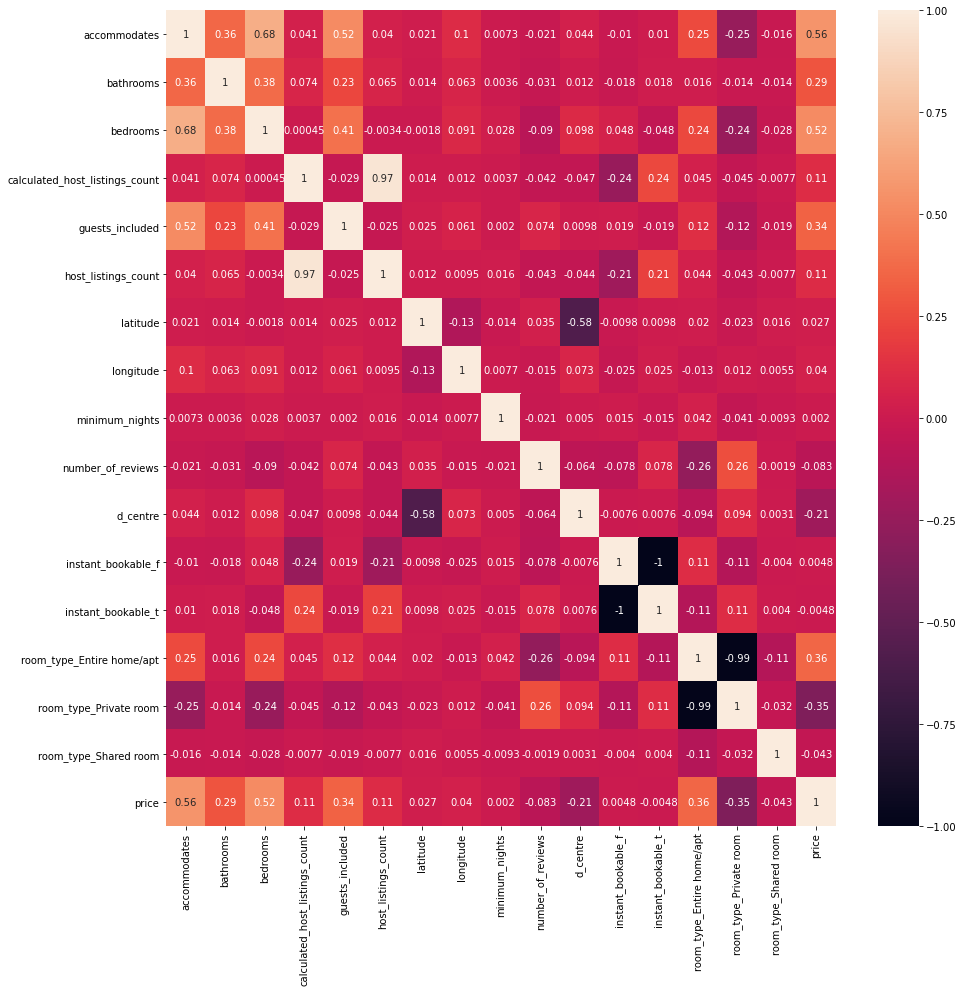

<AxesSubplot:>

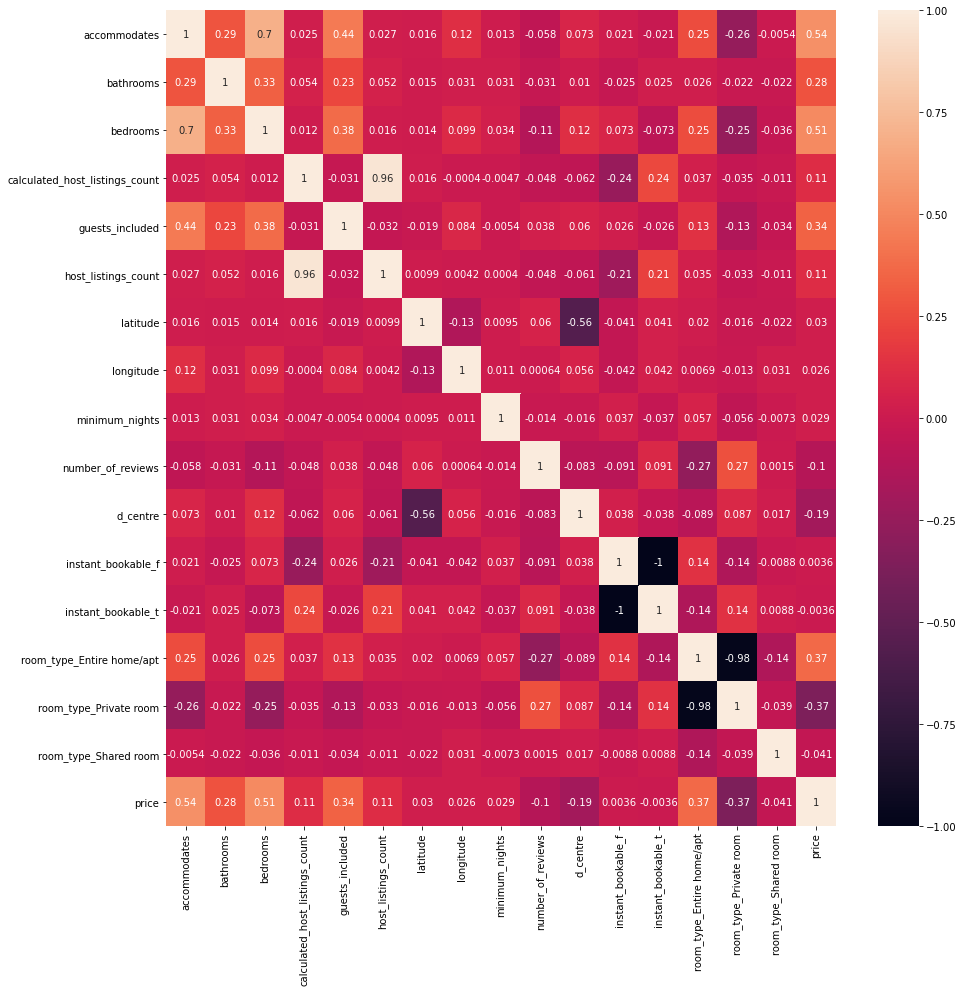

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

x_train['price'] = y_train['price']
x_test['price'] = y_test['price']

plt.figure(figsize=(15,15))

corr_x_train = x_train.corr()
sns.heatmap(corr_x_train,annot=True)
plt.show()

plt.figure(figsize=(15,15))
corr_x_test = x_test.corr()
sns.heatmap(corr_x_test,annot=True)

**PREGUNTA**: ¿Qué puede decir de los dos conjuntos? ¿Representan un espacio de datos similar?

### 2- Regresión Lineal con Modelo Lineal en 1D

**2.1** Indique las 5 características que tengan la mayor correlación (o anti-correlación, i.e., valores negativos) con respecto al precio de arriendo en el conjunto de entrenamiento. Realice un pairplot con estas variables.

accommodates                 0.558171
bedrooms                     0.520988
room_type_Entire home/apt    0.357866
room_type_Private room       0.353685
guests_included              0.340153
Name: price, dtype: float64


/Users/IkeMercado/opt/miniconda3/envs/datamining/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/IkeMercado/opt/miniconda3/envs/datamining/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/IkeMercado/opt/miniconda3/envs/datamining/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/IkeMercado/opt/miniconda3/envs/datamining/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/IkeMercado/opt/miniconda3/envs/datamining/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warning

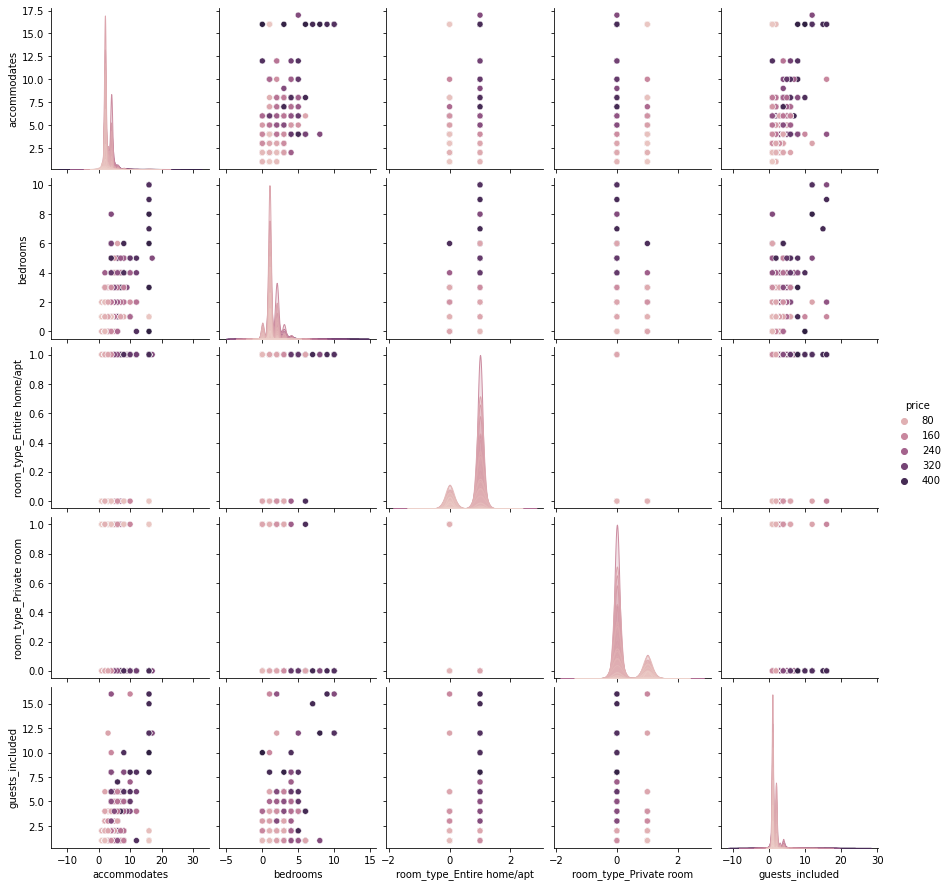

In [3]:
print(abs(corr_x_train['price']).sort_values(ascending=False)[1:6])
features = ['accommodates','bedrooms','room_type_Entire home/apt','room_type_Private room','guests_included']
sns.pairplot(x_train,vars=features,hue='price')

**PREGUNTA**: ¿Cuál es la dificultad de trabajar con estas características?

**2.2** Haga un diagrama de dispersión con las variables geográficas (latitud y longitud), incluyendo el precio como variable de color (en su colormap preferido) de los datos de entrenamiento. Agregue una imagen de Amsterdam para ver si coincide su topología.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

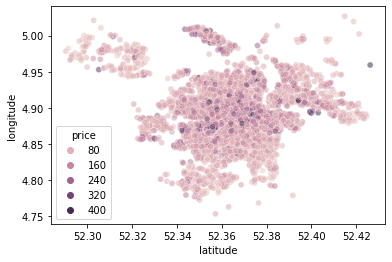

In [4]:
'latitude'  'longitude'
sns.scatterplot(data=x_train,x='latitude',y='longitude',hue='price',alpha=0.5)

**PREGUNTA**: ¿Puede identificar un patrón en los colores de esta imágen?

-no hay patron, se como homogeneo el precio

**2.3** Considerando el punto anterior, ahora tomaremos la variable ``d_centre`` como nuestro X y el ``price``como nuestro Y. Realice una regresión Ridge y una KernelRidge con kernel RBF para los datos de entrenamiento y parámetros por defecto. Realice un diagrama de dispersión de estas dos variables, y grafique ambas curvas de regresión en distintos colores. Calcule además el error cuadrático medio (Mean Squared Error) de entrenamiento y de testing para cada uno de los dos modelos (i.e., Ridge y KernelRidge).

In [5]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

#Train

X = x_train[["d_centre"]]
clf = KernelRidge(kernel="rbf")
clf.fit(X,y_train)
clf.predict(X)
print('MSE KernelRidge train = ',mean_squared_error(y_train["price"].values,clf.predict(X)))

rdg = Ridge()
rdg.fit(X,y_train.values)
rdg.predict(X)
print('MSE Ridge train = ',mean_squared_error(y_train["price"].values,rdg.predict(X)))


MSE KernelRidge train =  3841.62334194246
MSE Ridge train =  3886.9886746085763


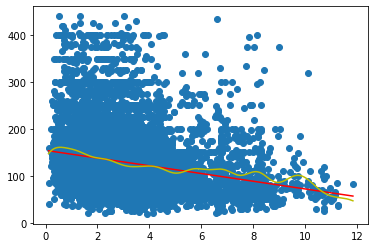

In [6]:
#Grafico Train
x_vals = np.linspace(X.min(),X.max(),X.size)
y_ridge = rdg.predict(x_vals)
y_kernel = clf.predict(x_vals)
plt.plot(x_vals,y_ridge,c='r')
plt.plot(x_vals,y_kernel,c='y')
plt.scatter(X,y_train["price"])
plt.show()

In [7]:
#test 

#SOLO SE FITEA EL X_TRAIN PORQUE EL TRAIN GENERA EL MODELO

X = x_test[["d_centre"]]
clf.predict(X)
print('MSE KernelRidge train = ',mean_squared_error(y_test["price"].values,clf.predict(X)))


rdg.predict(X)
print('MSE Ridge train = ',mean_squared_error(y_test["price"].values,rdg.predict(X)))


MSE KernelRidge train =  3892.239392997202
MSE Ridge train =  3937.7912680233735


**PREGUNTA**: ¿Cuál es un mejor modelo para estos datos y por qué?

### 3- Regresión en ND
**3.1** Vuelva a utilizar todo el dataset, estandarice el set de entramiento y ocupe la misma transformación para el testing. Deje sus datos estandarizados en dataframes pandas y haga un describe() del conjunto de entrenamiento.
Realice la regresión para el precio de arriendo, y reporte los errores cuadráticos medios al igual que en la pregunta 2.3.

In [8]:
from sklearn.preprocessing import StandardScaler

x_train = pd.DataFrame(pd.read_csv("train.csv"))
x_test = pd.DataFrame(pd.read_csv("test.csv"))
y_train = pd.DataFrame(pd.read_csv("y_train.csv"))
y_test = pd.DataFrame(pd.read_csv("y_test.csv"))

scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = pd.DataFrame(scaler.transform(x_train),columns = x_train.columns)
x_test_std = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

x_train_std.describe().round()



,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0,10498.0
mean,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-3.0,-2.0,-0.0,-1.0,-0.0,-5.0,-4.0,-0.0,-1.0,-2.0,-2.0,-0.0,-2.0,-1.0,-0.0
25%,-1.0,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,-1.0,-0.0,-0.0,-1.0,0.0,-0.0,1.0,-1.0,-0.0
50%,-1.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-1.0,-0.0
75%,1.0,-0.0,1.0,-0.0,1.0,-0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.0,1.0,-1.0,-0.0
max,11.0,19.0,10.0,10.0,15.0,9.0,4.0,4.0,65.0,14.0,5.0,0.0,2.0,1.0,2.0,16.0


In [9]:
#Train

X = x_train_std
clf = KernelRidge(kernel="rbf")
clf.fit(X,y_train)
clf.predict(X)
print('MSE KernelRidge train = ',mean_squared_error(y_train["price"].values,clf.predict(X)))

rdg = Ridge()
rdg.fit(X,y_train.values)
rdg.predict(X)
print('MSE Ridge train = ',mean_squared_error(y_train["price"].values,rdg.predict(X)))


MSE KernelRidge train =  1632.012008546672
MSE Ridge train =  2115.484817279046


In [10]:
#test 

#SOLO SE FITEA EL X_TRAIN PORQUE EL TRAIN GENERA EL MODELO

X = x_test_std
clf.predict(X)
print('MSE KernelRidge train = ',mean_squared_error(y_test["price"].values,clf.predict(X)))


rdg.predict(X)
print('MSE Ridge train = ',mean_squared_error(y_test["price"].values,rdg.predict(X)))


MSE KernelRidge train =  1954.7085633868971
MSE Ridge train =  2188.330377327452


**PREGUNTA**: ¿Qué conclusiones puede usted sacar en comparación con la pregunta 2.3?

**3.2** Realice un PCA a los datos de entrenamiento con una cantidad de componentes que expliquen al menos el 80% de la varianza (muestre el gráfico de varianza explicada). Aplique la misma transformación a los datos de testing. Ejecute otra vez las regresiones Ridge y KernelRidge y calcule nuevamente los errores cuadráticos medios. 

Text(0.5, 0, 'components')

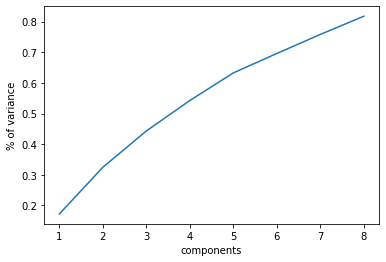

In [11]:
from sklearn.decomposition import PCA
n = 8
pca = PCA(n_components=n)
pca.fit(x_train_std)
x_train_pca = pca.transform(x_train_std)
var_x_train_pca = pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),var_x_train_pca.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")


In [12]:
#Train

X = x_train_pca
clf = KernelRidge(kernel="rbf")
clf.fit(X,y_train)
clf.predict(X)
print('MSE KernelRidge train = ',mean_squared_error(y_train["price"].values,clf.predict(X)))

rdg = Ridge()
rdg.fit(X,y_train.values)
rdg.predict(X)
print('MSE Ridge train = ',mean_squared_error(y_train["price"].values,rdg.predict(X)))


MSE KernelRidge train =  1834.9915509443456
MSE Ridge train =  2398.0846353677266


In [16]:
#test 
x_test_pca = pca.transform(x_test_std)

#SOLO SE FITEA EL X_TRAIN PORQUE EL TRAIN GENERA EL MODELO

X = x_test_pca
clf.predict(X)
print('MSE KernelRidge test = ',mean_squared_error(y_test["price"].values,clf.predict(X)))


rdg.predict(X)
print('MSE Ridge test = ',mean_squared_error(y_test["price"].values,rdg.predict(X)))


MSE KernelRidge test =  2072.023042570941
MSE Ridge test =  2429.111075485385


**Pregunta**: ¿Fué exitosa la aplicación de PCA? Fundamente su respuesta razonando sobre la función de PCA, y no solo comentando los resultados.

**3.3** Como usted conoce ya la API de scikit-learn, y esta es la misma para todos los regresores (i.e., de hecho lo es para todos los estimadores) realice una regresión con otra técnica (que no sea Lasso y Regresión Lineal Simple) y reporte sus errores cuadráticos medios de training y testing

In [13]:
# ponga aquí su código

**PREGUNTA FINAL**: Compare el resultado de la técnica que usted eligió con Kernel Ridge. 

In [19]:
from sklearn.linear_model import ElasticNet

#Train
X = x_train_pca
elast = ElasticNet()
elast.fit(X,y_train)
elast.predict(X)

print('MSE ElasticNet train = ',mean_squared_error(y_train["price"].values,elast.predict(X)))

#Test

X = x_test_pca
elast.predict(X)

print('MSE ElasticNet test = ',mean_squared_error(y_test["price"].values,elast.predict(X)))



MSE ElasticNet train =  2449.2670335024072
MSE ElasticNet test =  2505.540740209355
